In [1]:
%matplotlib notebook
import sys 
sys.path.append(r"C:\Users\a-sochat\development")

import numpy as np
import time

from qcodes.instrument.parameter import ManualParameter
from qcodes.sweep import sweep
from qcodes.sweep.sweep import time_trace

from v2_dataset_tools.experiments import do_experiment, get_results_from_db_path

pyqtgraph plotting not supported, try "from qcodes.plots.pyqtgraph import QtPlot" to see the full error


C:\Users\a-sochat\AppData\Local\Continuum\Anaconda3\envs\qcodes_dataset_tools\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<IPython.core.display.Javascript object>


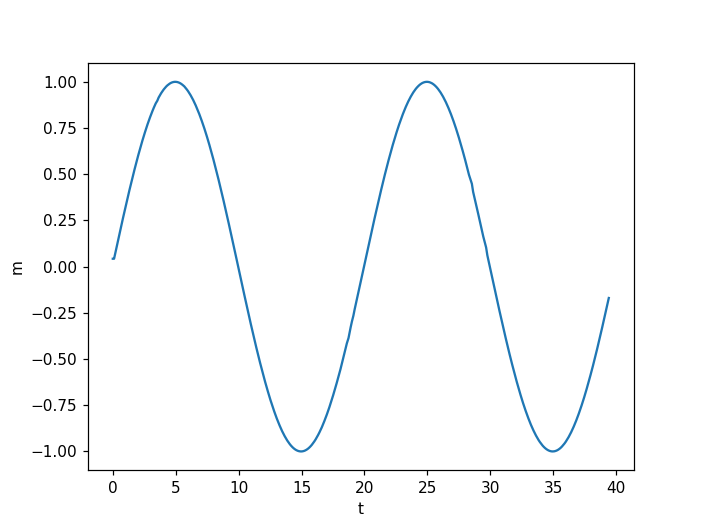

Starting experimental run with id: 25


C:\Users\a-sochat\AppData\Local\Continuum\Anaconda3\envs\qcodes_dataset_tools\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.042711513882782215, top=0.042711513882782215
  'bottom=%s, top=%s') % (bottom, top))


Completed measurement. Database path: cool_experiment/my_sample/21


In [2]:
t0 = None
m = ManualParameter("m", unit="A")
m.get = lambda: np.sin((time.time() - t0) * 2 * np.pi / 20)

def start_time():
    global t0
    t0 = time.time()

setup = [(start_time, tuple())]
cleanup = [(lambda: None, tuple())]

result = do_experiment(
    "cool_experiment/my_sample",
    setup,
    time_trace(m, 0.1, 40.0),
    cleanup,
    return_format=["data_set_path"], 
    live_plot_axes=[{"t": 0, "m": 1}]
)

In [3]:
data_set_path = result[0]
data = get_results_from_db_path(data_set_path, return_as_dict=True)